<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
# чтение файла и просмотр загруженных данных
df = pd.read_csv('gdrive/My Drive/2019.csv')
# df = pd.read_excel('WHR_2019.xlsx')
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [11]:
df.rename(columns = {'Overall rank':'Место в рейтинге', 'Country or region':'Страна или регион', 'Score':'Баллы', 'GDP per capita':'ВВП на душу населения', 'Social support':'Социальная поддержка', 'Healthy life expectancy':'Ожидаемая продолжительность здоровой жизни', 'Freedom to make life choices': 'Свобода жизненных выборов', 'Generosity':  'Щедрость', 'Perceptions of corruption':'Восприятие коррупции' }, inplace = True)
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [ ]:
score_list = df['Count'].tolist()

In [12]:
df.columns.tolist()

['Unnamed: 0', 'Id', 'Name', 'Year', 'Gender', 'State', 'Count']

In [14]:
df['Id'] = df['Year'] + df['Count']
df.head(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,2066,Emma,2004,F,AK,62
1,11350,2052,Madison,2004,F,AK,48
2,11351,2050,Hannah,2004,F,AK,46
3,11352,2048,Grace,2004,F,AK,44
4,11353,2045,Emily,2004,F,AK,41


In [15]:
df = df.drop(['State'], axis=1)
df.head(5)

,Unnamed: 0,Id,Name,Year,Gender,Count
0,11349,2066,Emma,2004,F,62
1,11350,2052,Madison,2004,F,48
2,11351,2050,Hannah,2004,F,46
3,11352,2048,Grace,2004,F,44
4,11353,2045,Emily,2004,F,41


In [16]:
df = df.drop(df.shape[0]-1, axis=0)
df.tail(5)

,Unnamed: 0,Id,Name,Year,Gender,Count
1016389,5647420,2019,Rowan,2014,M,5
1016390,5647421,2019,Seth,2014,M,5
1016391,5647422,2019,Spencer,2014,M,5
1016392,5647423,2019,Tyce,2014,M,5
1016393,5647424,2019,Victor,2014,M,5


In [17]:
df_copied = df.copy()
df_copied.head(5)

,Unnamed: 0,Id,Name,Year,Gender,Count
0,11349,2066,Emma,2004,F,62
1,11350,2052,Madison,2004,F,48
2,11351,2050,Hannah,2004,F,46
3,11352,2048,Grace,2004,F,44
4,11353,2045,Emily,2004,F,41


In [19]:
df['Name'].unique() # вывод самих значений
len(df['Name'].unique()) # их кол-ва

17632

In [20]:
df['Name'].nunique() # вывод числа уникальных значений для указанного столбца
df.nunique() # число уникальных значений для всех данных

,0
Unnamed: 0,1016394
Id,1918
Name,17632
Year,11
Gender,2
Count,1949


In [22]:
# подсчёт количества значений (по странам)
df['Name'].value_counts()
# видим, что в датасете все страны уникальны :)

,count
Name,
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049
...,...
Terryn,1
Yanna,1
Zemirah,1


In [24]:
# пример фильтрации
df[df['Name'] == 'Emma']

,Unnamed: 0,Id,Name,Year,Gender,Count
0,11349,2066,Emma,2004,F,62
205,11554,2054,Emma,2005,F,49
418,11767,2055,Emma,2006,F,49
644,11993,2048,Emma,2007,F,41
838,12187,2059,Emma,2008,F,51
...,...,...,...,...,...,...
1013854,5633487,2033,Emma,2010,F,23
1013983,5633616,2054,Emma,2011,F,43
1014104,5633737,2052,Emma,2012,F,40
1014222,5633855,2043,Emma,2013,F,30


In [25]:
df[df['Name'].str.startswith('N')]

,Unnamed: 0,Id,Name,Year,Gender,Count
14,11363,2029,Natalie,2004,F,25
46,11395,2018,Nicole,2004,F,14
60,11409,2017,Naomi,2004,F,13
61,11410,2017,Nevaeh,2004,F,13
106,11455,2012,Natasha,2004,F,8
...,...,...,...,...,...,...
1016237,5647268,2033,Noah,2014,M,19
1016272,5647303,2026,Nicholas,2014,M,12
1016331,5647362,2021,Nathan,2014,M,7
1016382,5647413,2019,Nathaniel,2014,M,5


In [27]:
# пример написания собственной функции и применение её через метод apply()
def my_lower(row):
  return row.lower()
df['Name'].apply(my_lower).head()

,Name
0,emma
1,madison
2,hannah
3,grace
4,emily


In [28]:
# группировка данных
df['Id_new'] = round(df['Id'])
df.groupby('Id_new').count() # обычный подсчёт кол-ва значений

,Unnamed: 0,Id,Name,Year,Gender,Count
Id_new,,,,,,
2009,12492,12492,12492,12492,12492,12492
2010,21814,21814,21814,21814,21814,21814
2011,28932,28932,28932,28932,28932,28932
2012,35066,35066,35066,35066,35066,35066
2013,40545,40545,40545,40545,40545,40545
...,...,...,...,...,...,...
5809,1,1,1,1,1,1
5832,1,1,1,1,1,1
5872,1,1,1,1,1,1


In [30]:
df = df.drop(['Name'], axis=1)

In [31]:
# группировка с подсчётом суммы по группам
df.groupby('Id_new').sum()

,Unnamed: 0,Id,Year,Gender,Count
Id_new,,,,,
2009,35020021592,25096428,25033968,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMM...,62460
2010,61274467837,43846140,43728078,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,118062
2011,80709715089,58182252,58015254,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,166998
2012,98711959355,70552792,70338606,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,214186
2013,113919791038,81617085,81356950,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,260135
...,...,...,...,...,...
5809,678594,5809,2004,M,3805
5832,684049,5832,2006,M,3826
5872,686916,5872,2007,M,3865


In [37]:
# группировка с агрегацией сразу по нескольким функциям
df_agg = df.groupby('Id_new').agg({
    'Id_new': 'count',
    'Id_new': 'sum'
})
df_agg

,Id_new
Id_new,
2009,25096428
2010,43846140
2011,58182252
2012,70552792
2013,81617085
...,...
5809,5809
5832,5832
5872,5872


In [46]:
# подготовка и создание сводной таблицы
df['Year_new'] = round(df['Year'])
pd.pivot_table(df,
               index=['Id_new'],
               columns=['Year_new'],
               values='Gender',
               aggfunc='count')

Year_new,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Id_new,,,,,,,,,,,
2009,12492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,8992.0,12822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,6602.0,9134.0,13196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,5240.0,6847.0,9442.0,13537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,4228.0,5440.0,7137.0,9904.0,13836.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5809,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5832,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# сортировка данных (по умолчанию - по возрастанию)
df.sort_values(by='Year').head()

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
0,11349,2066,2004,F,62,2066,2004
835870,4742892,2018,2004,M,14,2018,2004
835871,4742893,2018,2004,M,14,2018,2004
835872,4742894,2018,2004,M,14,2018,2004
835873,4742895,2018,2004,M,14,2018,2004


In [49]:
# сортировка данных (по убыванию, добавляем параметр ascending)
df.sort_values(by='Year', ascending=False).head()

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
1016393,5647424,2019,2014,M,5,2019,2014
883593,4935628,2030,2014,F,16,2030,2014
883582,4935617,2030,2014,F,16,2030,2014
883583,4935618,2030,2014,F,16,2030,2014
883584,4935619,2030,2014,F,16,2030,2014


In [50]:
# фильтрация
df[df['Count'] > 1]

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
0,11349,2066,2004,F,62,2066,2004
1,11350,2052,2004,F,48,2052,2004
2,11351,2050,2004,F,46,2050,2004
3,11352,2048,2004,F,44,2048,2004
4,11353,2045,2004,F,41,2045,2004
...,...,...,...,...,...,...,...
1016389,5647420,2019,2014,M,5,2019,2014
1016390,5647421,2019,2014,M,5,2019,2014
1016391,5647422,2019,2014,M,5,2019,2014
1016392,5647423,2019,2014,M,5,2019,2014


In [51]:
df[(df['Count'] > 1) & (df['Year_new'] > 2010)]

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
1497,12846,2071,2011,F,60,2071,2011
1498,12847,2067,2011,F,56,2067,2011
1499,12848,2061,2011,F,50,2061,2011
1500,12849,2057,2011,F,46,2057,2011
1501,12850,2055,2011,F,44,2055,2011
...,...,...,...,...,...,...,...
1016389,5647420,2019,2014,M,5,2019,2014
1016390,5647421,2019,2014,M,5,2019,2014
1016391,5647422,2019,2014,M,5,2019,2014
1016392,5647423,2019,2014,M,5,2019,2014


In [53]:
# удаление дубликатов строк из датасета по заданным столбцам
df_copied = df.copy()
df_copied.drop_duplicates(subset=['Year_new', 'Id_new'])

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
0,11349,2066,2004,F,62,2066,2004
1,11350,2052,2004,F,48,2052,2004
2,11351,2050,2004,F,46,2050,2004
3,11352,2048,2004,F,44,2048,2004
4,11353,2045,2004,F,41,2045,2004
...,...,...,...,...,...,...,...
954755,5293041,2443,2012,M,431,2443,2012
956981,5295267,2604,2014,M,590,2604,2014
975321,5428187,2452,2005,M,447,2452,2005
977191,5430057,2514,2007,M,507,2514,2007


In [54]:
df_copied = df.copy()
df_copied.drop_duplicates(subset=['Year_new', 'Id_new'], inplace=True)

In [55]:
# заполним пропуски нулями или удалим все NaN
df_copied.fillna(0)
# df_copied.dropna()

,Unnamed: 0,Id,Year,Gender,Count,Id_new,Year_new
0,11349,2066,2004,F,62,2066,2004
1,11350,2052,2004,F,48,2052,2004
2,11351,2050,2004,F,46,2050,2004
3,11352,2048,2004,F,44,2048,2004
4,11353,2045,2004,F,41,2045,2004
...,...,...,...,...,...,...,...
954755,5293041,2443,2012,M,431,2443,2012
956981,5295267,2604,2014,M,590,2604,2014
975321,5428187,2452,2005,M,447,2452,2005
977191,5430057,2514,2007,M,507,2514,2007


<Axes: xlabel='Id'>

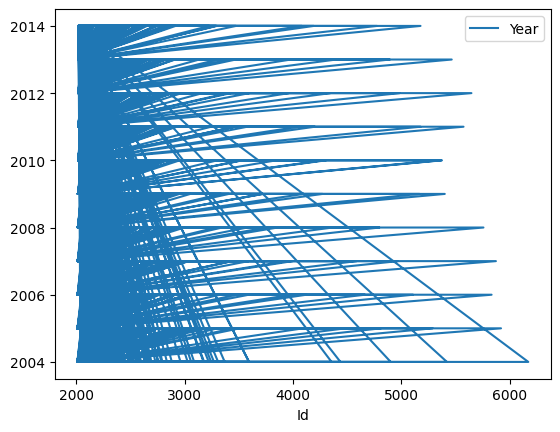

In [66]:
# обычный график зависимости
df.plot(x = 'Id', y = 'Year')

<Axes: ylabel='Frequency'>

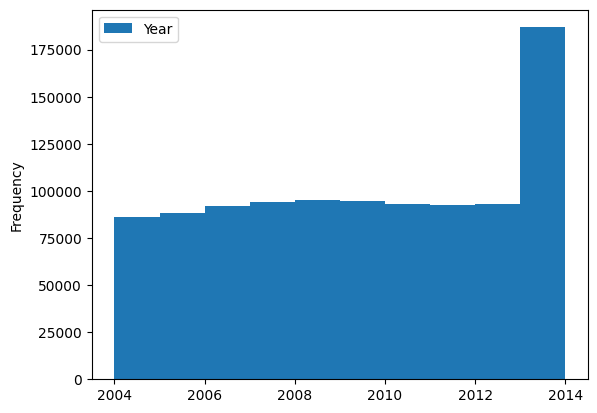

In [67]:
# гистограмма
df.plot.hist(x = 'Id', y = 'Year')

<Axes: xlabel='Id', ylabel='Year'>

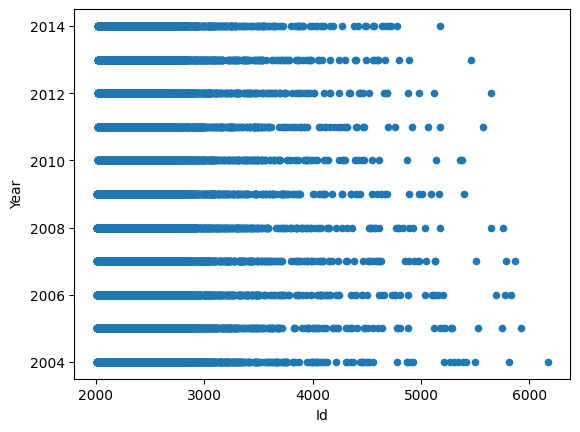

In [68]:
# точечный график
df.plot.scatter(x = 'Id', y = 'Year')

In [69]:
# сохранение файла
df.to_csv('2019_new.csv')